<a href="https://colab.research.google.com/github/nik-744/Tiny-ML/blob/main/Tiny_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**What is Edge AI and what role does Tiny ML plays in making edge AI**

Tiny Machine Learning (TinyML) is a field of machine learning that focuses on deploying models on low-power, resource-constrained devices like microcontrollers, enabling AI capabilities at the edge without relying on cloud connectivity.

Edge AI is a combination of artificial intelligence (AI) and edge computing that allows devices to process data locally. It's a more agile alternative to cloud computing, offering faster processing and less latency

In [23]:
# Install Required Libraries
pip install tensorflow numpy matplotlib

In [2]:
# Import Libraries
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Load the mnist dataset from tf.datasets
mnist = tf.keras.datasets.mnist
(x_train,y_train),(x_test,y_test) = mnist.load_data()

In [5]:
x_train,x_test= x_train/255.0,x_test/255.0

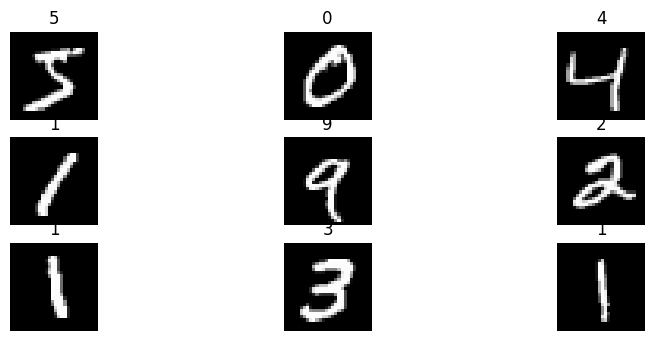

In [6]:
plt.figure(figsize=(10,8))
for i in range(9):
  plt.subplot(6,3,i+1)
  plt.imshow(x_train[i],cmap='gray')
  plt.title(y_train[i])
  plt.axis('off')
plt.show()

In [25]:
# Creating the model
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(10,activation='softmax')]
)

# Building the model
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

# Fitting the model
model.fit(x_train,y_train,epochs=5,validation_data=(x_test,y_test))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8756 - loss: 0.4305 - val_accuracy: 0.9594 - val_loss: 0.1388
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9646 - loss: 0.1183 - val_accuracy: 0.9688 - val_loss: 0.0979
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9758 - loss: 0.0800 - val_accuracy: 0.9710 - val_loss: 0.0960
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9821 - loss: 0.0582 - val_accuracy: 0.9731 - val_loss: 0.0866
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9868 - loss: 0.0438 - val_accuracy: 0.9749 - val_loss: 0.0802


In [18]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 305,312 (1.16 MB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 203,542 (795.09 KB)

Converting the model into a tensorflow lite model and storing it

In [10]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()
with open('model.tflite','wb') as f:
  f.write(tflite_model)

Saved artifact at '/tmp/tmpadwy80ko'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 28, 28), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 10), dtype=tf.float32, name=None)
Captures:
  136888704624848: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136888704625808: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136888704625232: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136888704625616: TensorSpec(shape=(), dtype=tf.resource, name=None)


Loading the saved tflite model

In [26]:
# Loading the saved tflite model
interpreter = tf.lite.Interpreter(model_path='/content/model.tflite')
# Allocate tensor buffers
interpreter.allocate_tensors()

# Initializing instances to get input and output details of the test image
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [29]:
# Image number
img_num = 587

# Converting the image in compatible format to feed it in the model
test_image = x_test[img_num].astype(np.float32).reshape(1,28,28)
interpreter.set_tensor(input_details[0]['index'],test_image)
# Invoking the interpreter predict
interpreter.invoke()

output_data = interpreter.get_tensor(output_details[0]['index'])
predicted_digit = np.argmax(output_data)

Text(0.5, 1.0, 'Predicted Digit: 6')

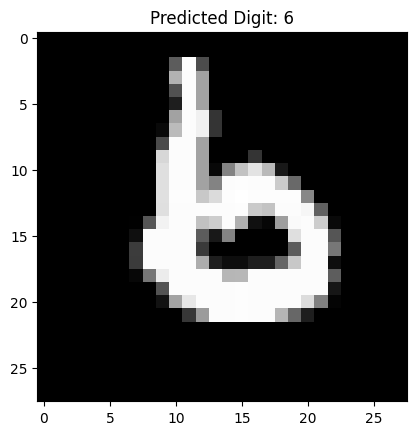

In [31]:
# Ploting the image and checking the predicted digit
plt.imshow(x_test[img_num],cmap='gray')
plt.title(f'Predicted Digit: {predicted_digit}')